In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
notebook_dir = os.getcwd()   

notebooks_folder = os.path.dirname(notebook_dir)

project_root = os.path.dirname(notebooks_folder)

data_path = os.path.join(project_root, "Data", "DataAfterPrepared.csv")

df = pd.read_csv(data_path)

df.head()


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_long_term
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [4]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_7828/196801821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7021 non-null   int64  
 1   Partner           7021 non-null   object 
 2   Dependents        7021 non-null   object 
 3   tenure            7021 non-null   int64  
 4   MultipleLines     7021 non-null   object 
 5   InternetService   7021 non-null   object 
 6   OnlineSecurity    7021 non-null   object 
 7   OnlineBackup      7021 non-null   object 
 8   DeviceProtection  7021 non-null   object 
 9   TechSupport       7021 non-null   object 
 10  StreamingTV       7021 non-null   object 
 11  StreamingMovies   7021 non-null   object 
 12  Contract          7021 non-null   object 
 13  PaperlessBilling  7021 non-null   object 
 14  PaymentMethod     7021 non-null   object 
 15  MonthlyCharges    7021 non-null   float64
 16  TotalCharges      7021 non-null   float64


In [6]:
objects_columns = df.select_dtypes(include = "object").columns

In [7]:
objects_columns.tolist()

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [8]:

encoders = {}

for column in objects_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

In [9]:
encoders

{'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7021 non-null   int64  
 1   Partner           7021 non-null   int64  
 2   Dependents        7021 non-null   int64  
 3   tenure            7021 non-null   int64  
 4   MultipleLines     7021 non-null   int64  
 5   InternetService   7021 non-null   int64  
 6   OnlineSecurity    7021 non-null   int64  
 7   OnlineBackup      7021 non-null   int64  
 8   DeviceProtection  7021 non-null   int64  
 9   TechSupport       7021 non-null   int64  
 10  StreamingTV       7021 non-null   int64  
 11  StreamingMovies   7021 non-null   int64  
 12  Contract          7021 non-null   int64  
 13  PaperlessBilling  7021 non-null   int64  
 14  PaymentMethod     7021 non-null   int64  
 15  MonthlyCharges    7021 non-null   float64
 16  TotalCharges      7021 non-null   float64


In [11]:
notebook_dir = os.getcwd()

notebooks_folder = os.path.dirname(notebook_dir)

project_root = os.path.dirname(notebooks_folder)

models_path = os.path.join(project_root, "models")

os.makedirs(models_path, exist_ok=True)

encoder_path = os.path.join(models_path, "encoder.pkl")

with open(encoder_path, "wb") as f:
    pickle.dump(encoders, f)

print(f"Encoder saved at: {encoder_path}")


Encoder saved at: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/models/encoder.pkl


In [12]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
df['Churn'].value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [14]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
y_train.value_counts()

Churn
0    4111
1    1505
Name: count, dtype: int64

In [17]:
# smote = SMOTE(random_state = 42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [18]:
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
# y_train_smote.value_counts()

In [20]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    # "LogisticRegression": LogisticRegression(random_state=42, max_iter=500)
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

}

In [21]:
# hyperparameters = {
#     "Random Forest": {
#         "n_estimators": [100, 200],
#         "max_depth": [5, 10, None],
#         "min_samples_split": [2, 5],
#         "min_samples_leaf": [1, 2],
#         "max_features": ["sqrt", "log2"]
#     },

#     "LogisticRegression": [
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['saga']},
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'saga']},
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9]},
#         {'C': [0.01, 0.1, 1, 10], 'penalty': ['none'], 'solver': ['lbfgs', 'saga']}
#     ]
# }
hyperparameters = {
    "Random Forest": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [5, 10, None],
        "classifier__min_samples_split": [2, 5],
        "classifier__min_samples_leaf": [1, 2],
        "classifier__max_features": ["sqrt", "log2"]
    },

    "XGBoost": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [3, 5, 7],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__subsample": [0.7, 1],
        "classifier__colsample_bytree": [0.7, 1]
    }
}

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# best_models = {}

# for model_name, model in models.items():
#     print(f"Tuning {model_name}...")

#     grid = GridSearchCV(
#         estimator=model,
#         param_grid=hyperparameters[model_name],
#         cv=cv,
#         scoring="f1", 
#         n_jobs=-1
#     )

#     grid.fit(X_train_smote, y_train_smote)

#     best_models[model_name] = grid.best_estimator_

#     print(f"Best parameters for {model_name}: {grid.best_params_}")
#     print(f"Best F1 score for {model_name}: {grid.best_score_:.4f}\n")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Pipeline مع SMOTE + موديل
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=hyperparameters[model_name],
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)  # نستخدم X_train و y_train بدون تطبيق SMOTE هنا

    best_models[model_name] = grid.best_estimator_

    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best F1 score for {model_name}: {grid.best_score_:.4f}\n")

Tuning Random Forest...


In [ ]:
best_models

{'Random Forest': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('classifier',
                  RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                         n_estimators=200, random_state=42))]),
 'XGBoost': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('classifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=0.7, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric='logloss',
                                feature_types=None, feature_weights=None,
                                gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=0.1,
             

In [ ]:


notebook_dir = os.getcwd()

notebooks_folder = os.path.dirname(notebook_dir)

project_root = os.path.dirname(notebooks_folder)

models_path = os.path.join(project_root, "models")

os.makedirs(models_path, exist_ok=True)

Random_Forest_path = os.path.join(models_path, "Random_Forest.pkl")

with open(Random_Forest_path, "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

print(f"best_model saved at: {Random_Forest_path}")


best_model saved at: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/models/Random_Forest.pkl


In [ ]:


notebook_dir = os.getcwd()

notebooks_folder = os.path.dirname(notebook_dir)

project_root = os.path.dirname(notebooks_folder)

models_path = os.path.join(project_root, "models")

os.makedirs(models_path, exist_ok=True)

XGBoost_path = os.path.join(models_path, "XGBoost.pkl")

# حفظ الملف
with open(XGBoost_path, "wb") as f:
    pickle.dump(best_models['XGBoost'], f)

print(f"best_model saved at: {XGBoost_path}")


best_model saved at: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/models/XGBoost.pkl


In [ ]:


notebook_dir = os.getcwd()

notebooks_folder = os.path.dirname(notebook_dir)

project_root = os.path.dirname(notebooks_folder)

models_path = os.path.join(project_root, "models")

os.makedirs(models_path, exist_ok=True)

scaler_path = os.path.join(models_path, "scaler.pkl")

with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print(f"scaler saved at: {scaler_path}")


scaler saved at: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/models/scaler.pkl


# XGBoost_path

In [ ]:
y_test_pred = best_models['XGBoost'].predict(X_test)
y_test_prob = best_models['XGBoost'].predict_proba(X_test)[:, 1]

In [ ]:
y_test_pred



array([1, 0, 0, ..., 0, 0, 0], shape=(1405,))

In [ ]:
y_test_prob


array([0.67151904, 0.33677822, 0.21140994, ..., 0.02575922, 0.25989655,
       0.07664529], shape=(1405,), dtype=float32)

In [ ]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))

print(f"Classification Report : \n", classification_report(y_test, y_test_pred))
print("F1 Score LogisticRegression:", f1_score(y_test, y_test_pred))


Accuracy :  0.7387900355871886
ROC - AUC Score :  0.7453582297332297
Confusion Matrix : 
 [[771 282]
 [ 85 267]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1053
           1       0.49      0.76      0.59       352

    accuracy                           0.74      1405
   macro avg       0.69      0.75      0.70      1405
weighted avg       0.80      0.74      0.75      1405

F1 Score LogisticRegression: 0.5926748057713651


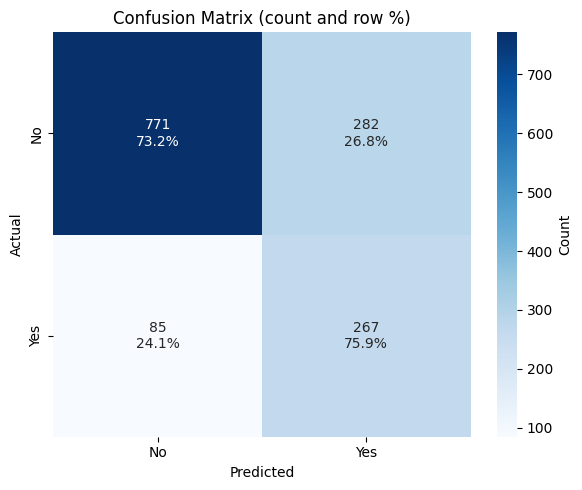

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
labels = ['No', 'Yes']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent = cm_norm * 100
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_percent[i, j]:.1f}%"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (count and row %)')
plt.tight_layout()
plt.show()

# Random_Forest

In [ ]:
y_test_pred2 = best_models['Random Forest'].predict(X_test)
y_test_prob2 = best_models['Random Forest'].predict_proba(X_test)[:, 1]

In [ ]:
y_test_pred2



array([1, 0, 0, ..., 0, 0, 0], shape=(1405,))

In [ ]:
y_test_prob2

array([0.67097754, 0.34121426, 0.1954407 , ..., 0.10020794, 0.35028174,
       0.16861788], shape=(1405,))

In [ ]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred2))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred2))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred2))

print(f"Classification Report : \n", classification_report(y_test, y_test_pred2))

Accuracy :  0.7494661921708186
ROC - AUC Score :  0.7581544612794612
Confusion Matrix : 
 [[780 273]
 [ 79 273]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1053
           1       0.50      0.78      0.61       352

    accuracy                           0.75      1405
   macro avg       0.70      0.76      0.71      1405
weighted avg       0.81      0.75      0.76      1405



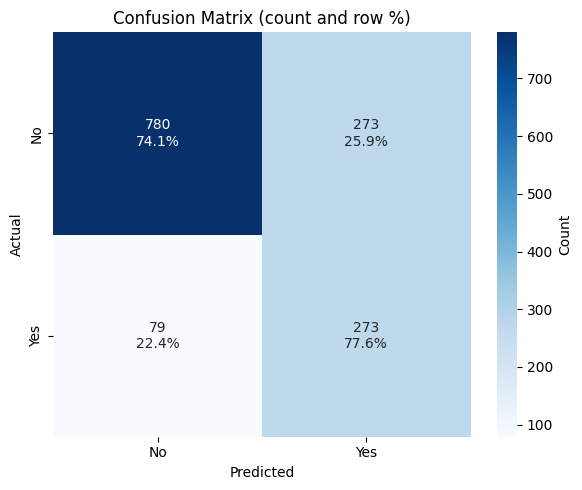

In [ ]:
cm = confusion_matrix(y_test, y_test_pred2)
labels = ['No', 'Yes']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_percent = cm_norm * 100
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{cm_percent[i, j]:.1f}%"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Count'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (count and row %)')
plt.tight_layout()
plt.show()

In [ ]:
notebook_dir = os.getcwd()


notebooks_folder = os.path.dirname(notebook_dir)
project_root = os.path.dirname(notebooks_folder)


models_path = os.path.join(project_root, "models")


XGBoost_path = os.path.join(models_path, "XGBoost.pkl")
encoders_path = os.path.join(models_path, "encoder.pkl")
scaler_path = os.path.join(models_path,"scaler.pkl")

# Load the model
with open(XGBoost_path, "rb") as f:
    loaded_model = pickle.load(f)
with open(encoders_path, 'rb') as encoders_file:
    encoders = pickle.load(encoders_file)
with open(scaler_path, 'rb') as scaler_file:
    scaler_data = pickle.load(scaler_file)

In [ ]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [ ]:
example_input_Churn = {
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85,
    'is_long_term': 0
}

In [ ]:
example_input_nonChurn = {
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'tenure': 50,
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Two year',
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Credit card (automatic)',
    'MonthlyCharges': 70.0,
    'TotalCharges': 3500.0,
    'is_long_term': 1
}


In [ ]:
prediction, prob = make_prediction(example_input_nonChurn)
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

Prediction: No Churn, Probability :  0.02
